# This notebook 

In this notebook are items that were checked outside of the data-analysis notebook, mainly to test issues or examine how they behave for the specifics of the data. For example, many of the features are inbalanced with many more zero than non-zero values. 

## How correlation coefficient is affected by zeros 

- The raw feature data is highly imbalanced in the sense that for most features, there are a lot more zero values than non-zero values. This is also true for the target data, e.g., predicted revenue. 
- The correlation coefficient of two arrays can be strongly influenced by this. A few examples are shown below. 
- The question is then: how to properly estimate the correlation between the different variables? between the features, and between the features and the target.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [101]:
def check_corr_coef_matched(x, y): 
    
    r = []
    ratio_of_padding = []
    
    for num_of_zeros in range(1, 1000):
        x_dummy = np.pad(x, (num_of_zeros, 0), 'constant', constant_values=(0, 0))
        y_dummy = np.pad(y, (num_of_zeros, 0), 'constant', constant_values=(0, 0))
        r.append(np.corrcoef(x_dummy, y_dummy)[0][1])
        ratio_of_padding.append(len(x)/num_of_zeros)
        
    
    return r, ratio_of_padding    

In [117]:
def check_corr_coef_not_matched(x, y, mu, sigma, prob = 0.1): 
    
    r = []
    ratio_of_padding = []
    
    for num_of_zeros in range(1, 1000):
        x_dummy = np.pad(x, (num_of_zeros, 0), 'constant', constant_values=(0, 0))
        y_dummy = np.pad(y, (num_of_zeros, 0), 'constant', constant_values=(0, 0))
        
        for k in range(num_of_zeros):
            if np.random.uniform(0,1) < prob:
                y_dummy[k] = np.random.normal(mu, sigma, 1)[0]
        
        r.append(np.corrcoef(x_dummy, y_dummy)[0][1])
        ratio_of_padding.append(len(x)/num_of_zeros)
        
    
    return r, ratio_of_padding   

In [88]:
mu, sigma = 0, 3

In [95]:
x = np.arange(10, 20)
# y = np.array([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])
y = [k + np.random.normal(mu, sigma, 1)[0] for k in x]
print(x)
print(y)

[10 11 12 13 14 15 16 17 18 19]
[13.402502773032753, 10.58666927691781, 6.36120424521987, 14.895940515068066, 10.388621908630308, 16.00164265369218, 16.547003521180567, 13.510031175730177, 13.109012961521131, 18.01851999194665]


In [96]:
actual_corr = np.corrcoef(x, y)
print(actual_corr)

[[1.         0.56221753]
 [0.56221753 1.        ]]


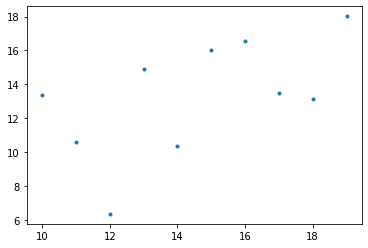

In [97]:
plt.plot(x, y, '.')
plt.show()

In [98]:
r, ratio_of_padding = check_corr_coef_matched(x, y)

In [99]:
r.append(actual_corr[0][1])
ratio_of_padding.append(11)

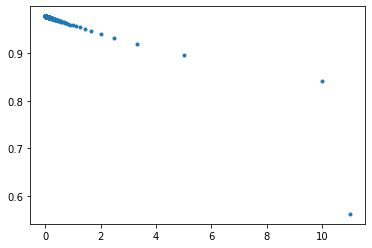

In [100]:
plt.plot(ratio_of_padding, r, '.')
plt.show()

As can be seen, when the zeros in both arrays are perfectly matched, the correlation coefficient increases with the number of zeros. The value at x = 11 is the correlation of the non-padded arrays. 

In [118]:
r_not_matched, ratio_of_padding_not_matched = check_corr_coef_not_matched(x, y, mu, sigma)

In [119]:
r_not_matched.append(actual_corr[0][1])
ratio_of_padding_not_matched.append(11)

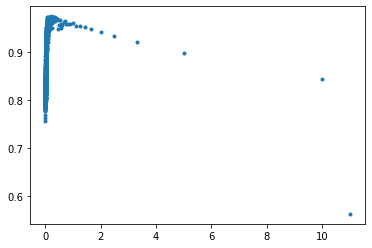

In [120]:
plt.plot(ratio_of_padding_not_matched, r_not_matched, '.')
plt.show()

If 10% of the padded zero values in one array are matched with non-zero values at the other array, it strongly impact the correlation from when the ratio of the padding to the original size array (here it is len(x) = len(y) = 10) is lower than 1 -> the padding is higher than 10 (so now x is = [0 0 0 0 0 0 0 0 0 0] + x). 

In [121]:
r_not_matched, ratio_of_padding_not_matched = check_corr_coef_not_matched(x, y, mu, sigma, prob = 0.5)

In [122]:
r_not_matched.append(actual_corr[0][1])
ratio_of_padding_not_matched.append(11)

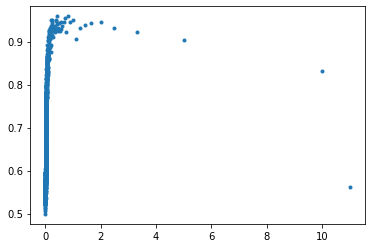

In [123]:
plt.plot(ratio_of_padding_not_matched, r_not_matched, '.')
plt.show()

And this is how it looks for when 50% of the padded zero are not matched. Obviously, the correlation goes down. 

## Log histograms

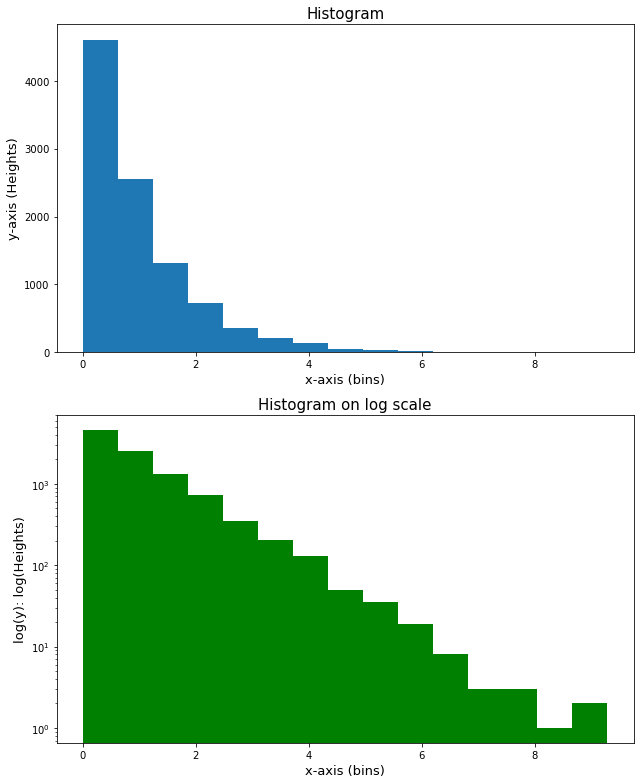

In [6]:
# Preparing the data for the plots
np.random.seed(217)
x = np.random.exponential(1, 10000)
nbins = 15

# Resizing the figure
plt.figure(figsize=[9, 11])

# Plotting the histogram without log scale
plt.subplot(211)
plt.hist(x, bins=nbins)
plt.title('Histogram', fontsize=15)
plt.xlabel('x-axis (bins)', fontsize=13)
plt.ylabel('y-axis (Heights)', fontsize=13)
 
# Plotting the histogram on log scale 
plt.subplot(212)
counts, bins, bars = plt.hist(x, bins=nbins, log=True, color='g')
plt.title('Histogram on log scale', fontsize=15)
plt.xlabel('x-axis (bins)', fontsize=13)
plt.ylabel('log(y): log(Heights)', fontsize=13)

plt.tight_layout()
plt.show()

In [13]:
counts.shape

(15,)

In [18]:
bins

array([3.13723793e-06, 6.19088877e-01, 1.23817462e+00, 1.85726036e+00,
       2.47634610e+00, 3.09543184e+00, 3.71451758e+00, 4.33360332e+00,
       4.95268906e+00, 5.57177480e+00, 6.19086054e+00, 6.80994628e+00,
       7.42903202e+00, 8.04811776e+00, 8.66720350e+00, 9.28628924e+00])

In [17]:
bins_center = []
for k in range(len(bins) - 1):
    bins_center.append((bins[k] + bins[k+1])/2)

print(bins_center)

[0.30954600726697906, 0.9286317473250789, 1.5477174873831787, 2.166803227441279, 2.7858889674993783, 3.4049747075574786, 4.024060447615579, 4.643146187673678, 5.262231927731778, 5.881317667789878, 6.500403407847978, 7.119489147906078, 7.7385748879641785, 8.357660628022277, 8.976746368080377]


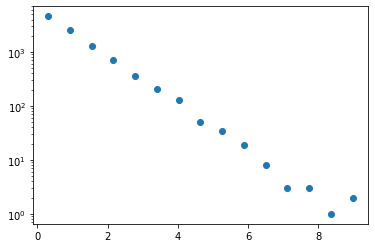

In [37]:
plt.scatter(bins_center, counts)
plt.yscale('log')

In [33]:
model = np.polyfit(bins_center, np.log(counts), 1)
slope = model[0]
intercept = model[1]
print(slope, intercept)

-0.9866521714697215 8.679377087848549


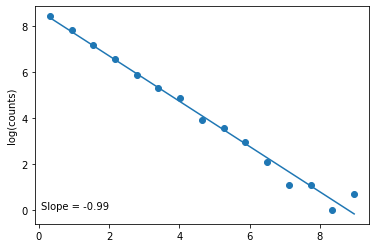

In [48]:
plt.scatter(bins_center, np.log(counts))
plt.plot(bins_center, [(slope*k + intercept) for k in bins_center])
plt.ylabel('log(counts)')
plt.text(0.05, 0.05, 'Slope = {:.2}'.format(slope))
plt.show()

## Log - Log histograms

In [49]:
a = 5. # shape
samples = 1000
s = np.random.power(a, samples)

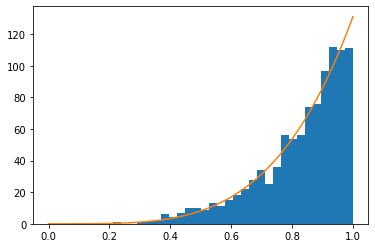

In [51]:
count, bins, ignored = plt.hist(s, bins=30)
x = np.linspace(0, 1, 100)
y = a*x**(a-1.)
normed_y = samples*np.diff(bins)[0]*y
plt.plot(x, normed_y)
plt.show()

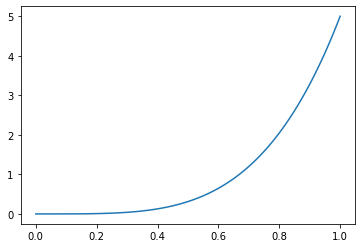

In [52]:
plt.plot(x, y)
plt.show()

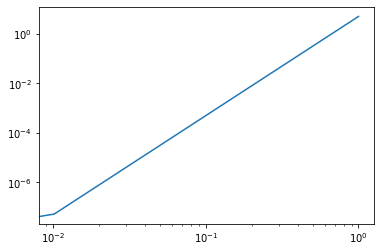

In [53]:
plt.loglog(x, y)
plt.show()

# Mutual Information 

The following example was adapted from [here](https://stackoverflow.com/questions/70820610/discrete-features-parameter-in-sklearn-feature-selection-mutual-info-classif) on stockoverflow.   
Comment: in this case, with the target and cat_feature being random, the result of 0 mutual information actually make more sense than any positive number. 

In [6]:
from sklearn.feature_selection import mutual_info_classif
from time import time
from scipy.sparse import csr_matrix
import numpy as np

If we set the flag discrete_features = 'auto', it will determine that discrete_features = True if the input is sparse; and if the input is dense it will treat it as continuous.

For example:

In [3]:
np.random.seed(111)

In [4]:
target = np.random.binomial(1,0.5,20)
cat_feature = np.random.binomial(3,0.5,(20,2))

In [8]:
print(target)
print(cat_feature)

[1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1]
[[2 2]
 [2 3]
 [2 2]
 [1 0]
 [1 0]
 [2 2]
 [2 1]
 [3 1]
 [2 1]
 [1 2]
 [1 1]
 [1 3]
 [3 2]
 [0 3]
 [3 2]
 [1 3]
 [1 1]
 [0 0]
 [0 1]
 [0 1]]


In [9]:
mutual_info_classif(cat_feature, target, discrete_features=True)

array([0.03219502, 0.00257154])

it's different from specifying it False :

In [10]:
mutual_info_classif(cat_feature, target, discrete_features=False)

array([0.00565161, 0.        ])

Now if we use 'auto' its the same as discrete_features=False since the input is dense:

In [11]:
mutual_info_classif(cat_feature, target, discrete_features='auto')

array([0, 0])

We can make the input sparse, and get the same output as when we specify discrete = True:

In [12]:
cat_feature = csr_matrix(cat_feature)
print(type(cat_feature))

mutual_info_classif(cat_feature, target, discrete_features="auto")

<class 'scipy.sparse.csr.csr_matrix'>


array([0.03219502, 0.00257154])

You have this option because we often one-hot encode categorical features, and a sparse matrix is more suitable given the amount of zeros.

# Density Scatter Plot

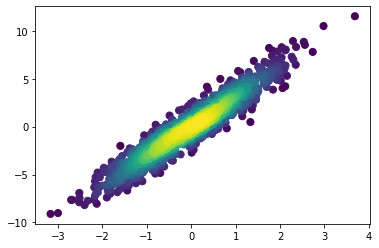

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Generate fake data
x = np.random.normal(size=1000)
y = x * 3 + np.random.normal(size=1000)

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=50)
plt.show()